In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
import math
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot

In [23]:
df=pd.read_csv('cleaned_data (1)')
df

,Unnamed: 0,region,province,name,tc,cres,csor,istat,area,pop,...,msw,sor,geo,roads,s_wteregio,s_landfill,gdp,proads,wage,finance
0,0,Emilia_Romagna,Ferrara,Comacchio,502.250000,129.270004,66.419998,38006,283.750000,22648,...,33956781,60.07,3.000000,285.000000,33.105049,15.233530,7.269942,4.354818,9.438692,7.488041
1,1,Emilia_Romagna,Ferrara,Lagosanto,228.050003,49.520000,44.139999,38011,34.439999,4952,...,2411867,75.93,3.000000,11.000000,33.105049,15.233530,7.109984,6.082588,9.510139,7.323284
2,2,Emilia_Romagna,Ferrara,Goro,268.010010,50.610001,44.599998,38025,26.620001,3895,...,2159322,78.49,3.000000,49.000000,33.105049,15.233530,7.267856,4.335555,8.891356,7.485891
3,3,Emilia_Romagna,Ferrara,Mesola,199.089996,41.110001,40.439999,38014,84.300003,7140,...,3651915,78.89,3.000000,165.000000,33.105049,15.233530,7.085936,3.710479,9.433685,7.298514
4,4,Puglia,Barletta-Andria-Trani,Margherita di Savoia,233.639999,58.270000,25.950001,110005,35.700001,12193,...,7195880,42.06,1.000000,60.000000,4.046452,45.411903,7.247444,5.274037,9.125561,7.464867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4336,4336,Veneto,Vicenza,unknown2,122.500000,44.320000,43.590000,24125,20.709681,5031,...,2113374,71.70,2.989247,68.373626,9.898176,11.296785,7.231159,4.452678,9.637836,7.002821
4337,4337,Lombardia,Varese,unknown3,126.220001,51.250000,22.620001,12143,8.419592,2623,...,1240725,79.55,3.000000,44.833402,38.501492,4.551430,7.231159,5.027392,9.624770,7.037059
4338,4338,Veneto,Belluno,unknown4,94.190002,17.080000,47.700001,25074,73.694736,13515,...,5554469,88.30,2.947368,114.016667,9.898176,11.296785,7.231159,3.963644,9.650623,7.237466
4339,4339,Veneto,Vicenza,unknown5,169.559998,70.230003,75.250000,24127,20.709681,4683,...,2172620,67.73,2.989247,68.373626,9.898176,11.296785,7.231159,4.452678,9.637836,7.002821


In [24]:
df=df.drop(['Unnamed: 0'],axis=1)

In [25]:
df2=df
df2=df2.drop('region',axis=1)
df1=df2.groupby('province').count()
df1=df1.reset_index()
drop_province=df1[df1.name<50]
province=df1[df1.name>=50]
province=list(province.province)
drop_province=list(drop_province.province)
#df3[df3.province==province]
print(len(set(province)))
for i in drop_province:
  df2=df2.drop(df2.index[(df2["province"] == i)])
print(province)
df2.province.value_counts()
#df2.head()


29
['Avellino', 'Benevento', 'Bergamo', 'Biella', 'Bologna', 'Bolzano', 'Brescia', 'Caserta', 'Chieti', 'Como', 'Cosenza', 'Cremona', 'Imperia', 'Lecco', 'Mantova', 'Milano', 'Monza e della Brianza', 'Napoli', 'Padova', 'Pavia', 'Pordenone', 'Potenza', 'Roma', 'Salerno', 'Savona', 'Sondrio', 'Udine', 'Varese', 'Vicenza']


Bergamo                  218
Brescia                  172
Milano                   131
Bolzano                  115
Salerno                  112
Como                     106
Cremona                  102
Udine                    102
Varese                    99
Vicenza                   97
Pavia                     94
Lecco                     80
Napoli                    80
Avellino                  79
Caserta                   78
Roma                      70
Cosenza                   69
Chieti                    69
Biella                    64
Mantova                   63
Sondrio                   62
Padova                    60
Savona                    59
Benevento                 56
Bologna                   54
Monza e della Brianza     54
Potenza                   54
Imperia                   52
Pordenone                 50
Name: province, dtype: int64

In [26]:
sc_X = StandardScaler()
sc_y = StandardScaler()
dict1={}
for i in province:
  #print(i)
  df3=df2[df2['province']==i]
  #print(df3.isnull().sum())
  #print(df3.finance)
  #print(df3.shape)
  X=df3[numeric]
  #print(X.shape)
  X = sc_X.fit_transform(X)
  y=df3.finance
  #print(y.shape)
  
  X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)
  svr = SVR(C=10, epsilon=0.1, gamma=0.0001, kernel='rbf')
  svr_fit=svr.fit(X_train,y_train)
  r2=svr.score(X_test, y_test)
  #print(r2)
  dict1.update({i:r2})
print(dict1)

{'Avellino': 0.3313952537948993, 'Benevento': 0.28510458564226493, 'Bergamo': 0.7919947979115938, 'Biella': 0.3097232127285632, 'Bologna': 0.5567706508885785, 'Bolzano': 0.4364810155478499, 'Brescia': 0.8176260865183105, 'Caserta': 0.48564091624107375, 'Chieti': 0.051008037772171666, 'Como': 0.664084755402792, 'Cosenza': 0.3321640122754902, 'Cremona': 0.6640267271320586, 'Imperia': 0.160154736421535, 'Lecco': 0.6113326173032683, 'Mantova': 0.5836065863851234, 'Milano': 0.7631930594218355, 'Monza e della Brianza': -0.6206586438296942, 'Napoli': 0.4809643746328842, 'Padova': 0.21181021987845816, 'Pavia': 0.536998849756855, 'Pordenone': 0.5177702598149447, 'Potenza': -0.30094622566034834, 'Roma': 0.16203638344660565, 'Salerno': 0.5080053617878334, 'Savona': 0.1403142074542565, 'Sondrio': 0.555600338186823, 'Udine': 0.6737876490463143, 'Varese': 0.7412427024012519, 'Vicenza': 0.4502546049430387}


In [27]:
numeric=list(df.select_dtypes(include=[np.number]).columns.values)
numeric.remove('finance')

In [28]:
sc_X = StandardScaler()
sc_y = StandardScaler()



In [59]:
numeric.remove('gdp')

In [60]:
X=df[numeric]
X = sc_X.fit_transform(X)
y=df['finance']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)
svr = SVR(C=10, epsilon=0.1, gamma=0.0001, kernel='rbf')
svr_fit=svr.fit(X_train,y_train)

In [64]:
y_predict=svr.predict(X_test)


In [65]:
svr.score(X_train,y_train),svr.score(X_test,y_test)


(0.5178339819562015, 0.5267976049938585)

In [32]:
cv=cross_validate(svr, X, y, cv=5)

In [33]:
print('5 folds accuracy:',cv['test_score']*100)
print('mean accuracy of 5 folds:',cv['test_score'].mean()*100,'%')

5 folds accuracy: [95.83739572 95.90510443 96.75020213 95.18818261 93.78053196]
mean accuracy of 5 folds: 95.49228336907933 %


In [34]:
parameters = {'kernel': ('linear', 'rbf','poly'), 'C':[1.5, 10],'gamma': [1e-7, 1e-4],'epsilon':[0.1,0.2,0.5,0.3]}
grid_search = GridSearchCV(estimator = svr, param_grid = parameters, 
                          cv = 3, n_jobs = -1, verbose = 2)

grid_search.fit(X,y)
grid_search.best_params_

Fitting 3 folds for each of 48 candidates, totalling 144 fits


{'C': 10, 'epsilon': 0.1, 'gamma': 0.0001, 'kernel': 'rbf'}

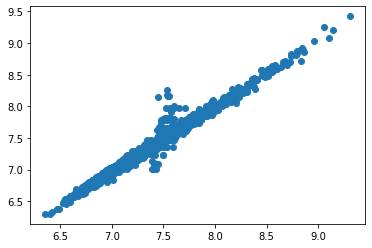

In [36]:
plt.scatter(y_predict,y_test)


In [62]:
from sklearn.inspection import permutation_importance
perm_importance=permutation_importance(svr, X_train, y_train)
permutation_importance
svrcoef= pd.Series(permutation_importance,numeric)


Text(0.5, 0, 'Permutation Importance')

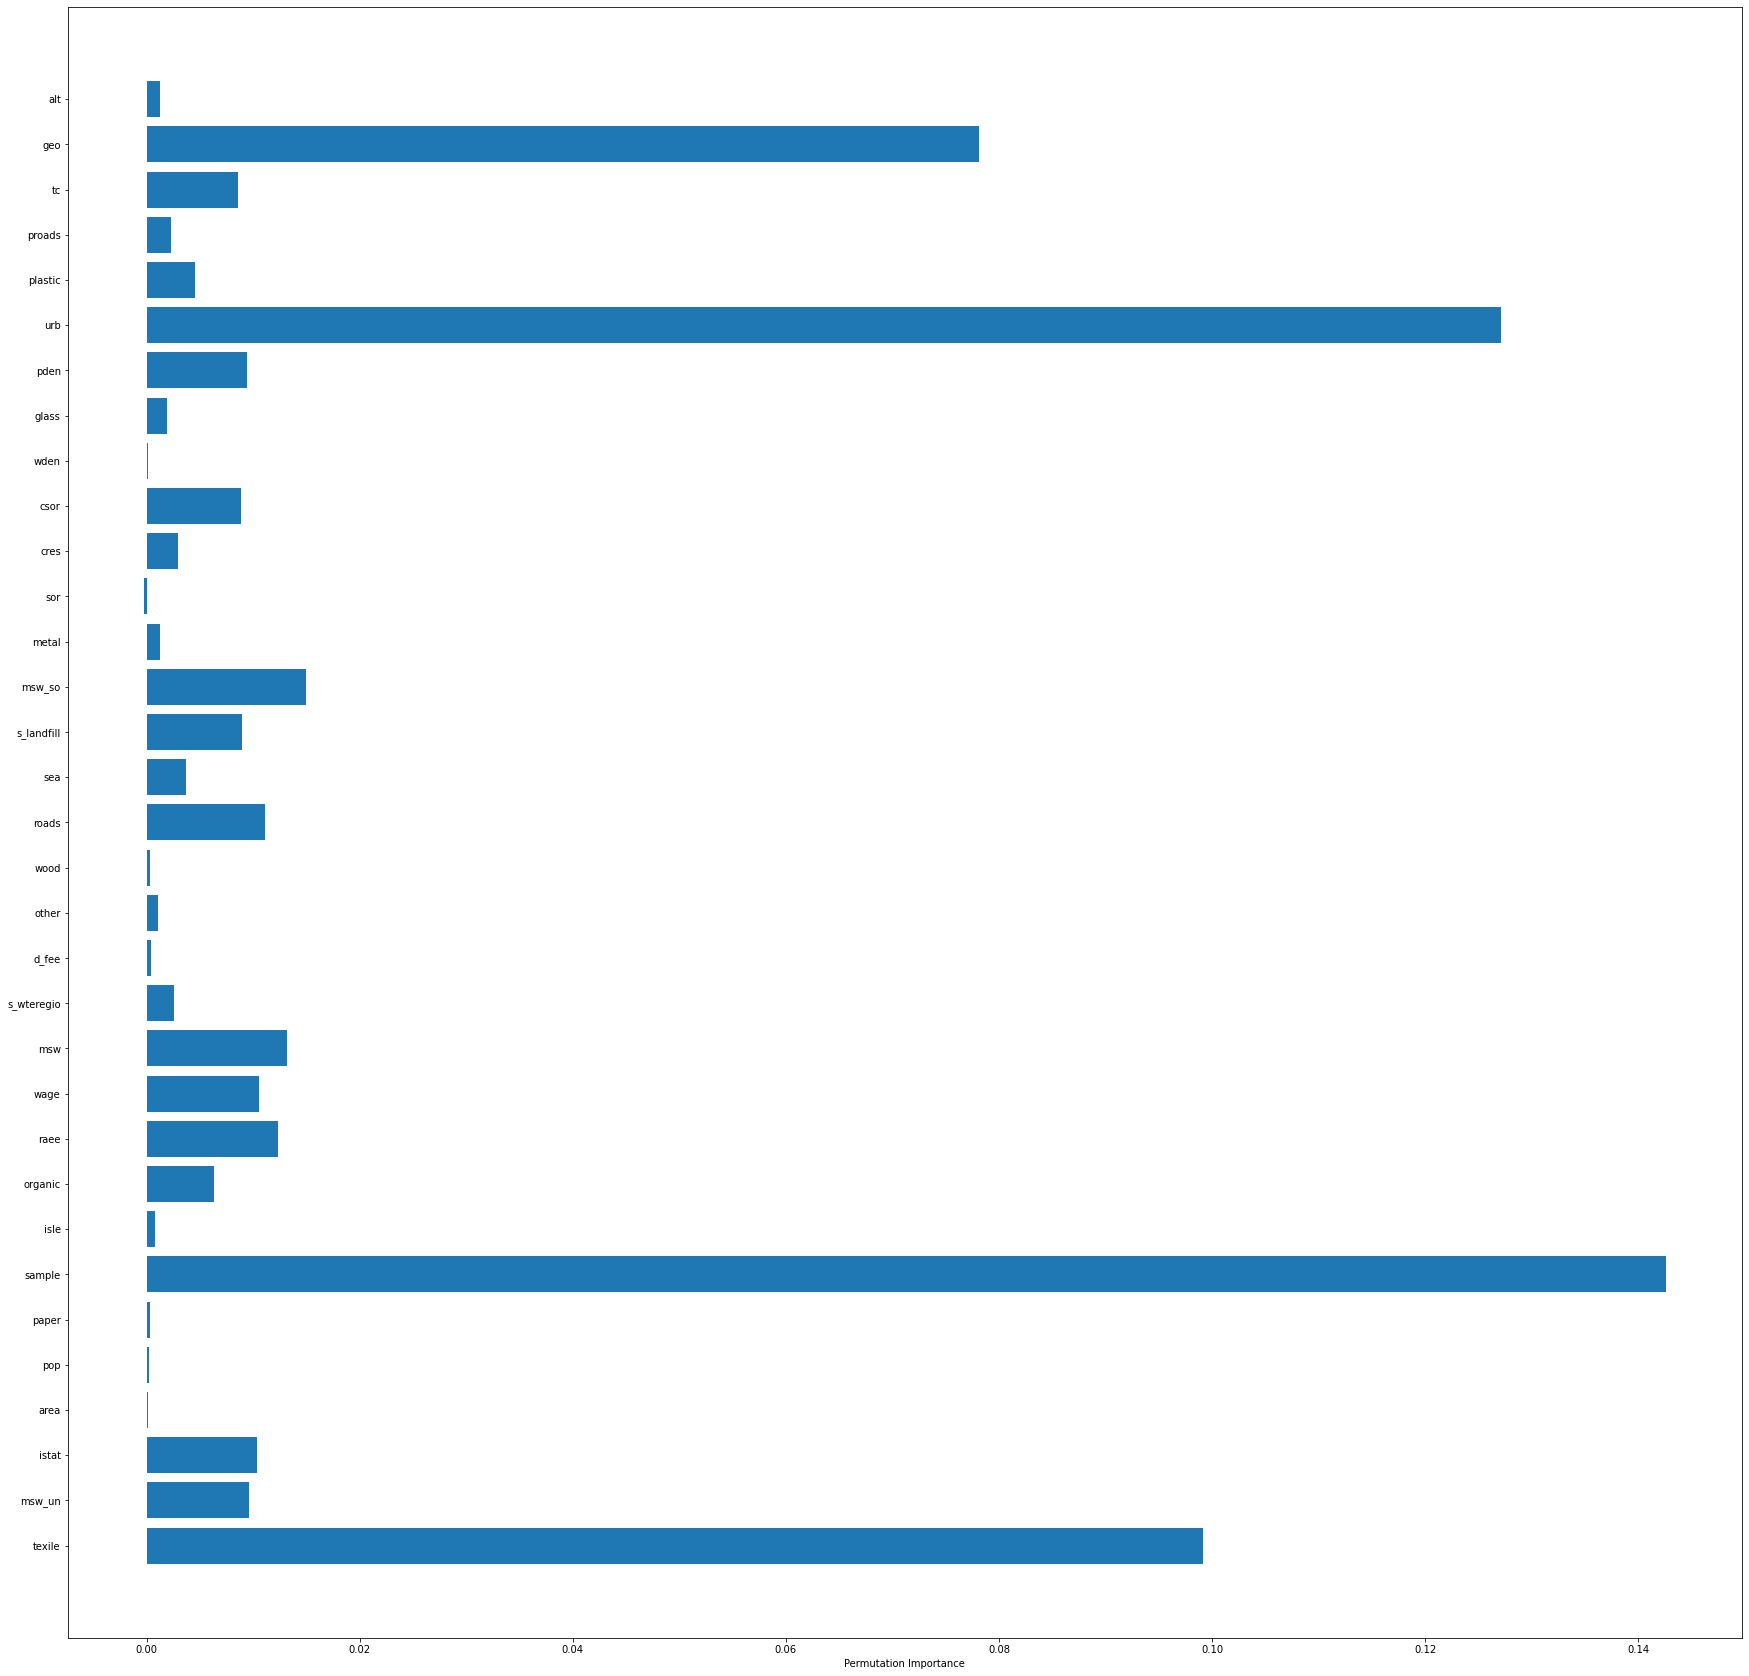

In [67]:
numeric=np.array(numeric)
 
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(numeric[sorted_idx], perm_importance.importances_mean)
plt.xlabel("Permutation Importance")

After adding gdp

In [69]:
numeric=list(df.select_dtypes(include=[np.number]).columns.values)
numeric.remove('finance')

In [70]:
X=df[numeric]
X = sc_X.fit_transform(X)
y=df['finance']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)
svr = SVR(C=10, epsilon=0.1, gamma=0.0001, kernel='rbf')
svr_fit=svr.fit(X_train,y_train)

In [71]:
y_predict=svr.predict(X_test)

In [72]:
from sklearn.inspection import permutation_importance
perm_importance=permutation_importance(svr, X_train, y_train)
permutation_importance
svrcoef= pd.Series(permutation_importance,numeric)


Text(0.5, 0, 'Permutation Importance')

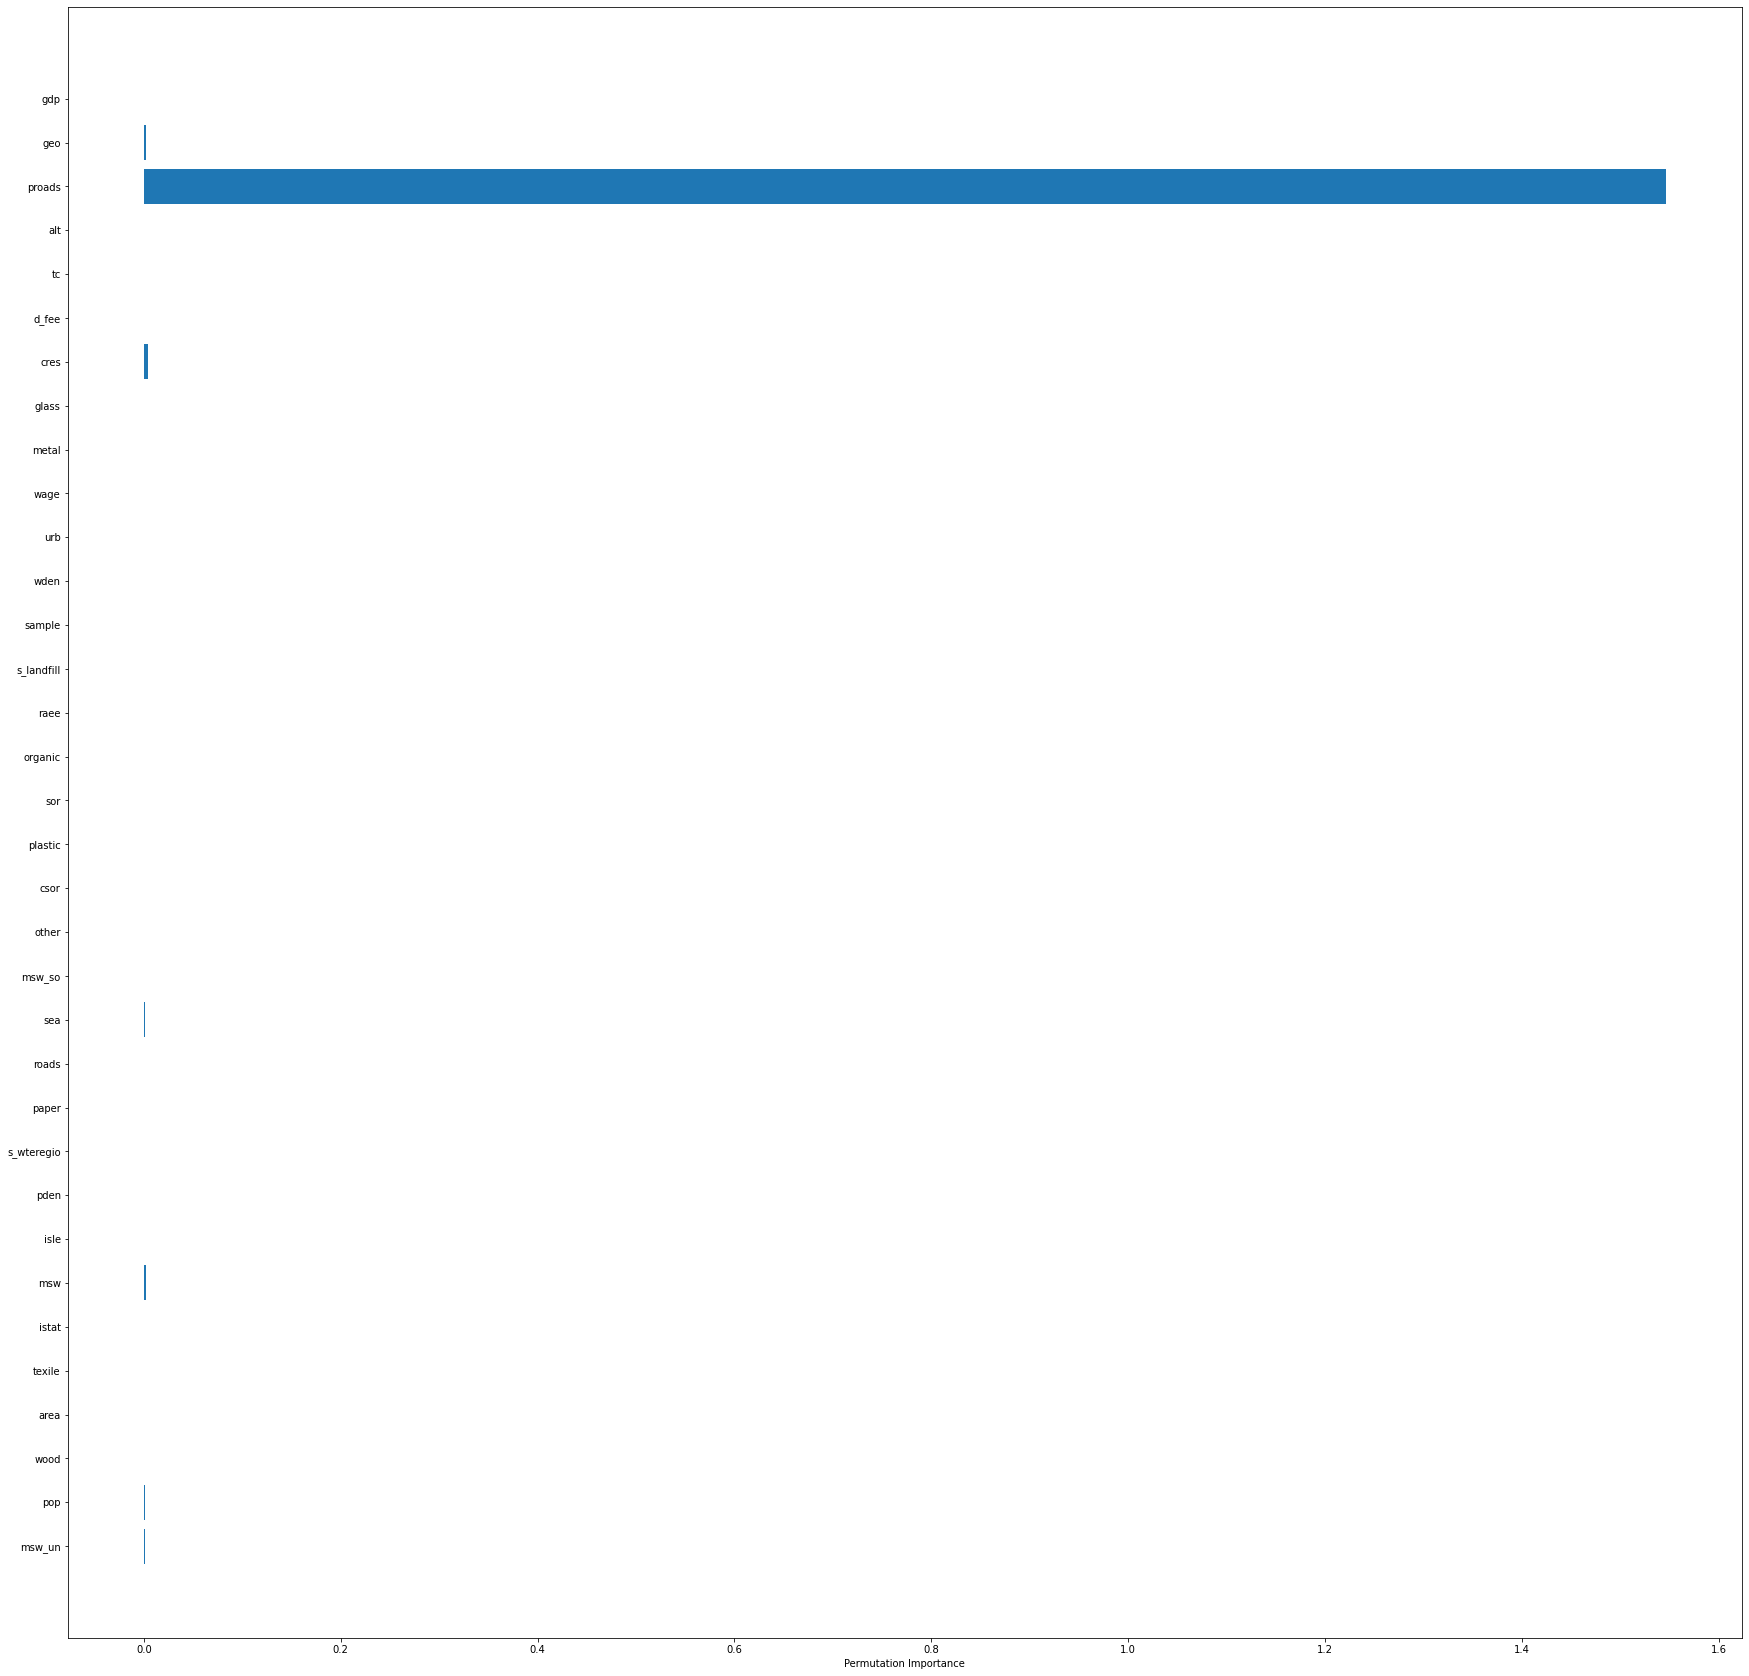

In [73]:
numeric=np.array(numeric)
 
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(numeric[sorted_idx], perm_importance.importances_mean)
plt.xlabel("Permutation Importance")

In [53]:
dict_df = pd.DataFrame(list(dict1.items()),columns = ['column1','column2']) 
dict_df=dict_df.sort_values(by=['column2'])
dict_df=dict_df.tail(10)
dict_df

,column1,column2
4,Bologna,0.556771
14,Mantova,0.583607
13,Lecco,0.611333
11,Cremona,0.664027
9,Como,0.664085
26,Udine,0.673788
27,Varese,0.741243
15,Milano,0.763193
2,Bergamo,0.791995
6,Brescia,0.817626


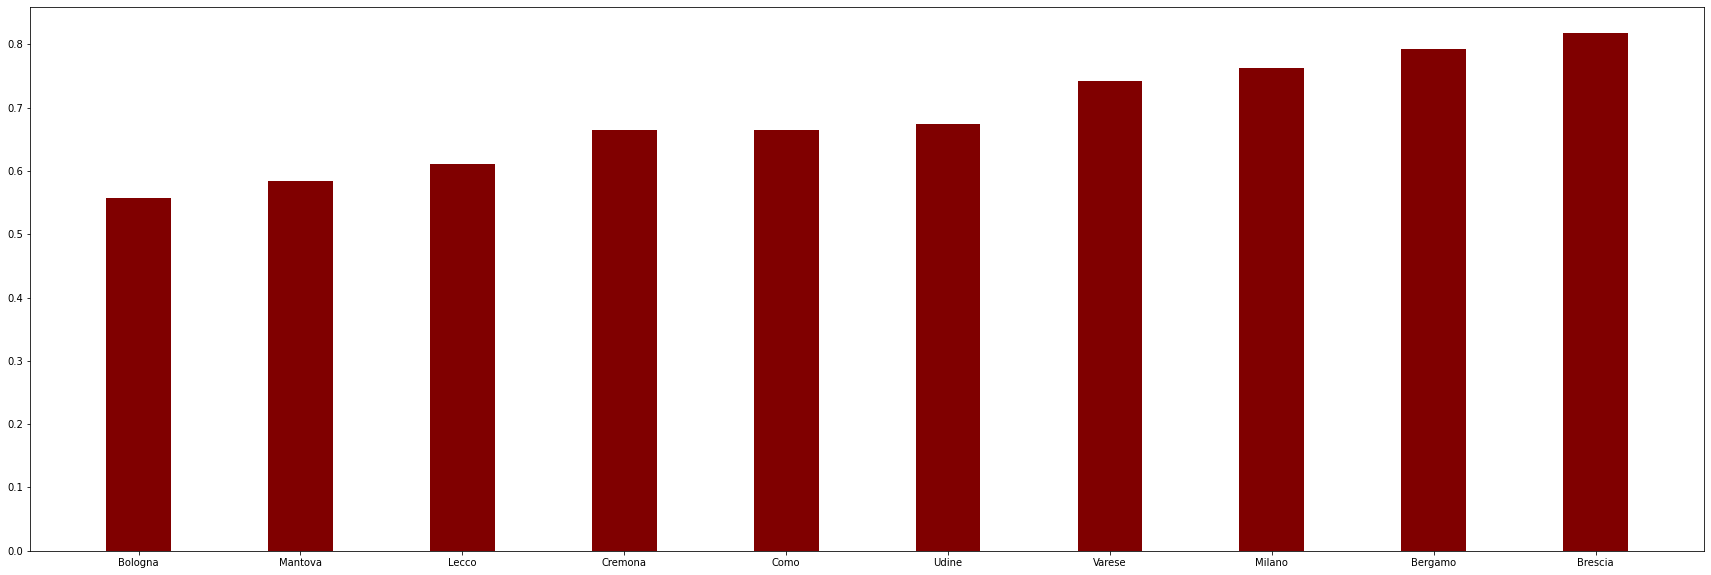

In [54]:
fig = plt.figure(figsize = (30, 10))
import matplotlib.pyplot as plt
import numpy as np

y = dict_df['column2']
mylabels = dict_df['column1']
plt.bar(mylabels, y, color ='maroon',
        width = 0.4)
plt.show()

In [74]:
pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


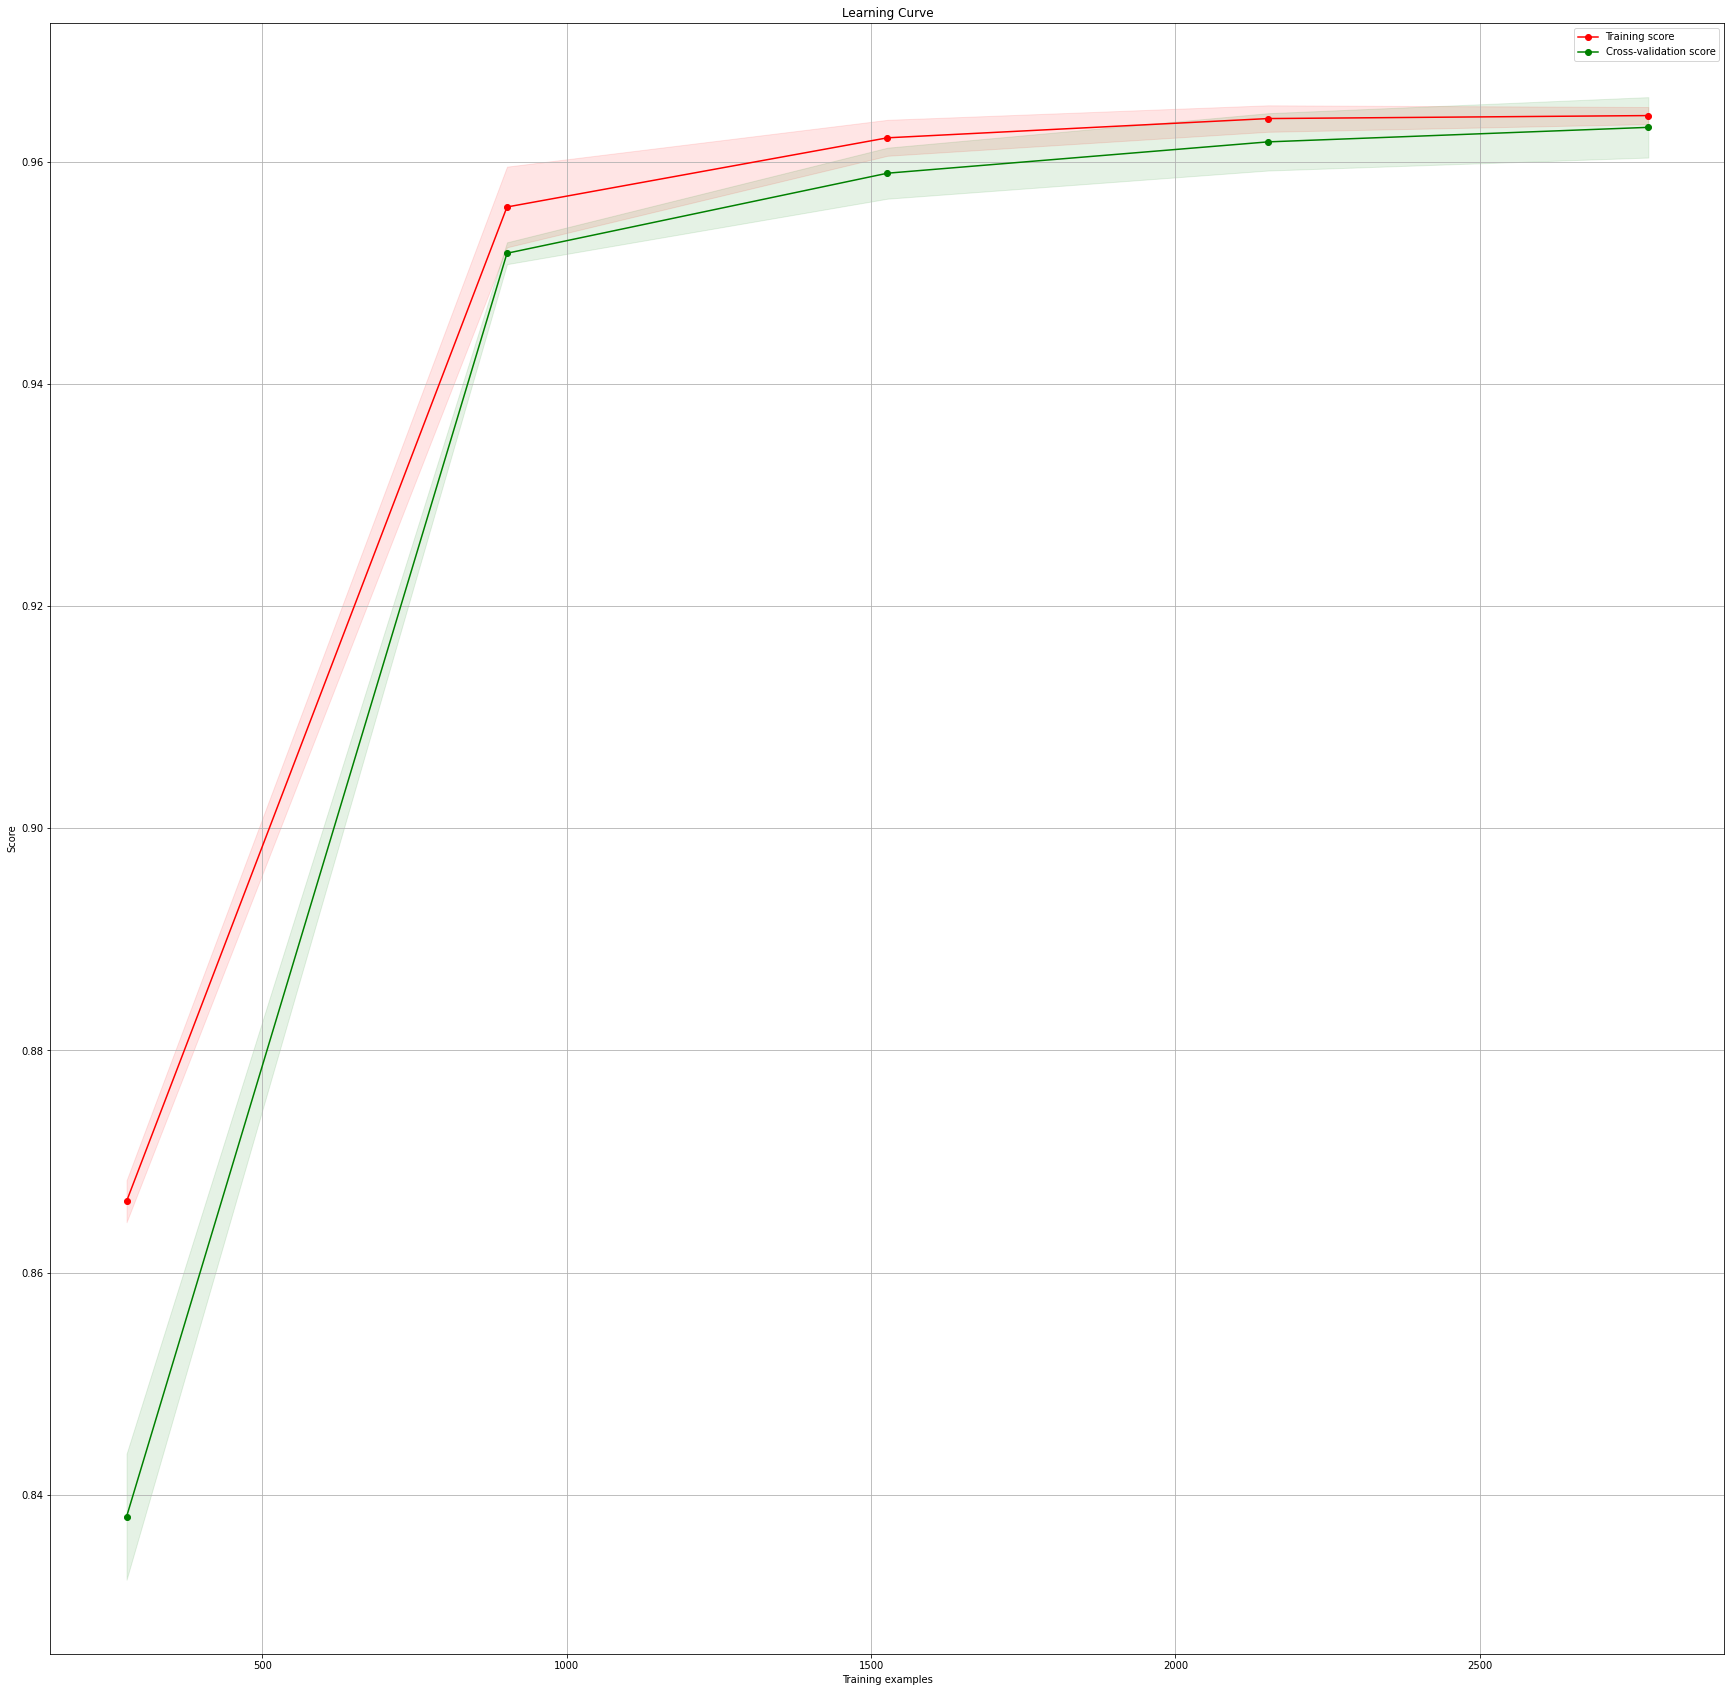

In [76]:
import scikitplot as skplt
skplt.estimators.plot_learning_curve(svr,X_train,y_train)